In [1]:
import numpy as np

import keras
from keras import applications
from keras.models import model_from_json
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils.generic_utils import CustomObjectScope

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
classes = !ls data/train

In [4]:
num_classes = len(classes)

In [5]:
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, GlobalAveragePooling2D

In [6]:
mobile_base = mobilenetv2.MobileNetV2(weights='imagenet', include_top=False)
x = mobile_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=mobile_base.input, outputs=outputs)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/keras_applications/mobilenet_v2.py:315: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [7]:
from keras.optimizers import Adam

In [8]:
model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=0.0001),
                metrics=['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_generator = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_generator = ImageDataGenerator(rescale=1. / 255)

In [11]:
train_dataset = train_generator.flow_from_directory(
                "data/train",
                target_size = (224, 224),
                batch_size = 32,
                class_mode = 'categorical')

Found 37836 images belonging to 75 classes.


In [12]:
val_dataset = train_generator.flow_from_directory(
              "data/test",
              target_size = (224, 224),
              class_mode = 'categorical')

Found 12709 images belonging to 75 classes.


In [13]:
model.fit_generator(train_dataset,
                    steps_per_epoch = 37836 // 32,
                    epochs = 3,
                    validation_data = val_dataset,
                    validation_steps = 1)

Epoch 1/3
1182/1182 [==============================] - 742s 627ms/step - loss: 0.2630 - acc: 0.9463 - val_loss: 0.1474 - val_acc: 0.9375
Epoch 2/3
1182/1182 [==============================] - 767s 649ms/step - loss: 0.0184 - acc: 0.9929 - val_loss: 0.1006 - val_acc: 0.9375
Epoch 3/3
1182/1182 [==============================] - 766s 648ms/step - loss: 0.0206 - acc: 0.9917 - val_loss: 0.3602 - val_acc: 0.9375


In [14]:
from keras.models import model_from_json

In [48]:
model_json = model.to_json()
with open("models/fruit-temp-v1.json", "w") as json_file:
    json_file.write(model_json)

In [49]:
model.save_weights("models/fruit-temp-v1.h5")

In [3]:
with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
    model_json = open('models/fruit-temp-v1.json').read()
    model = model_from_json(model_json)
    model.load_weights("models/fruit-temp-v1.h5")
print("Model loaded")

Model loaded


In [4]:
model.save("models/fruit-v1.h5")

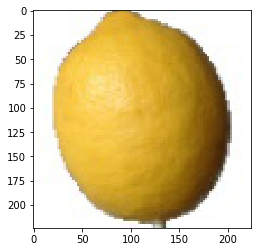

In [37]:
img = img_to_array(load_img('data/train/Lemon/101_100.jpg', target_size=(224, 224)))
plt.imshow(np.uint8(img))
plt.show()

In [38]:
img_b = np.expand_dims(img, axis=0)
img_p = img_b.copy()/255

In [39]:
predictions = model.predict(img_p)

In [40]:
classes[np.argmax(predictions)]

'Lemon'

In [42]:
classes[:3]

['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2']

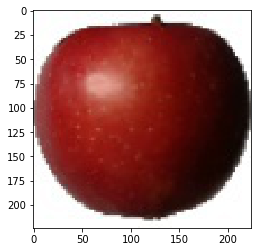

In [43]:
img = img_to_array(load_img('data/train/Apple Braeburn/101_100.jpg', target_size=(224, 224)))
plt.imshow(np.uint8(img))
plt.show()

In [44]:
img_b = np.expand_dims(img, axis=0)
img_p = img_b.copy()/255

In [45]:
predictions = model.predict(img_p)

In [47]:
classes[np.argmax(predictions)]

'Apple Braeburn'

In [50]:
from keras import backend as K

In [51]:
import tensorflow as tf

In [52]:
saver = tf.train.Saver()

In [54]:
saver.save(K.get_session(), 'models/fruit-temp-v1.ckpt')

'models/fruit-temp-v1.ckpt'